In [1]:
import numpy as np
import pandas
import scanpy
import scanpy as sc
import anndata
import matplotlib.pyplot as plt
import scanpy.plotting as scp
import seaborn as sns
from collections import defaultdict
%matplotlib inline

import numpy as np
import pandas as pd
import scanpy as sc

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

/home/ubuntu/.local/lib/python3.6/site-packages/numba/errors.py:105: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


scanpy==1.4 anndata==0.6.19 numpy==1.16.3 scipy==1.2.1 pandas==0.24.2 scikit-learn==0.20.3 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 


In [2]:
df = anndata.read("./write/tgfb1-5-treated.h5ad")

In [3]:
!ls ./write

S1-final.h5ad	   tgfb1-3-nontreated.h5ad  tgfb1-5-nontreated.h5ad
S2-final.h5ad	   tgfb1-3-treated.h5ad     tgfb1-5-treated.h5ad
merged-final.h5ad  tgfb1-4-nontreated.h5ad
tgfb1-2.h5ad	   tgfb1-4-treated.h5ad


In [4]:
df

AnnData object with n_obs × n_vars = 7047 × 7176 
    obs: 'batch', 'cellular_barcode', 'n_counts', 'percent_mito', 'S_score', 'G2M_score', 'phase', 'louvain', 'cVSMC signature', 'fibroblast signature', 'ALK5 signature', 'ALK1 signature'
    var: 'gene_names', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'velocity_gamma', 'velocity_r2', 'velocity_genes'
    uns: 'genes_before_highly_variable', 'genes_original', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'phase_colors', 'velocity_graph', 'velocity_graph_neg'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    varm: 'PCs'
    layers: 'Ms', 'Mu', 'ambiguous', 'spliced', 'unspliced', 'variance_velocity', 'velocity'

In [5]:
sc.set_figure_params(scanpy=True, dpi=600, dpi_save=600, frameon=True, vector_friendly=True, fontsize=10, color_map=None, format='pdf', transparent=False, ipython_format='png2x')

# The heatmap is commented out

Divergent color map has been automatically set to plot non-raw data. Use `vmin`, `vmax` and `cmap` to adjust the plot.


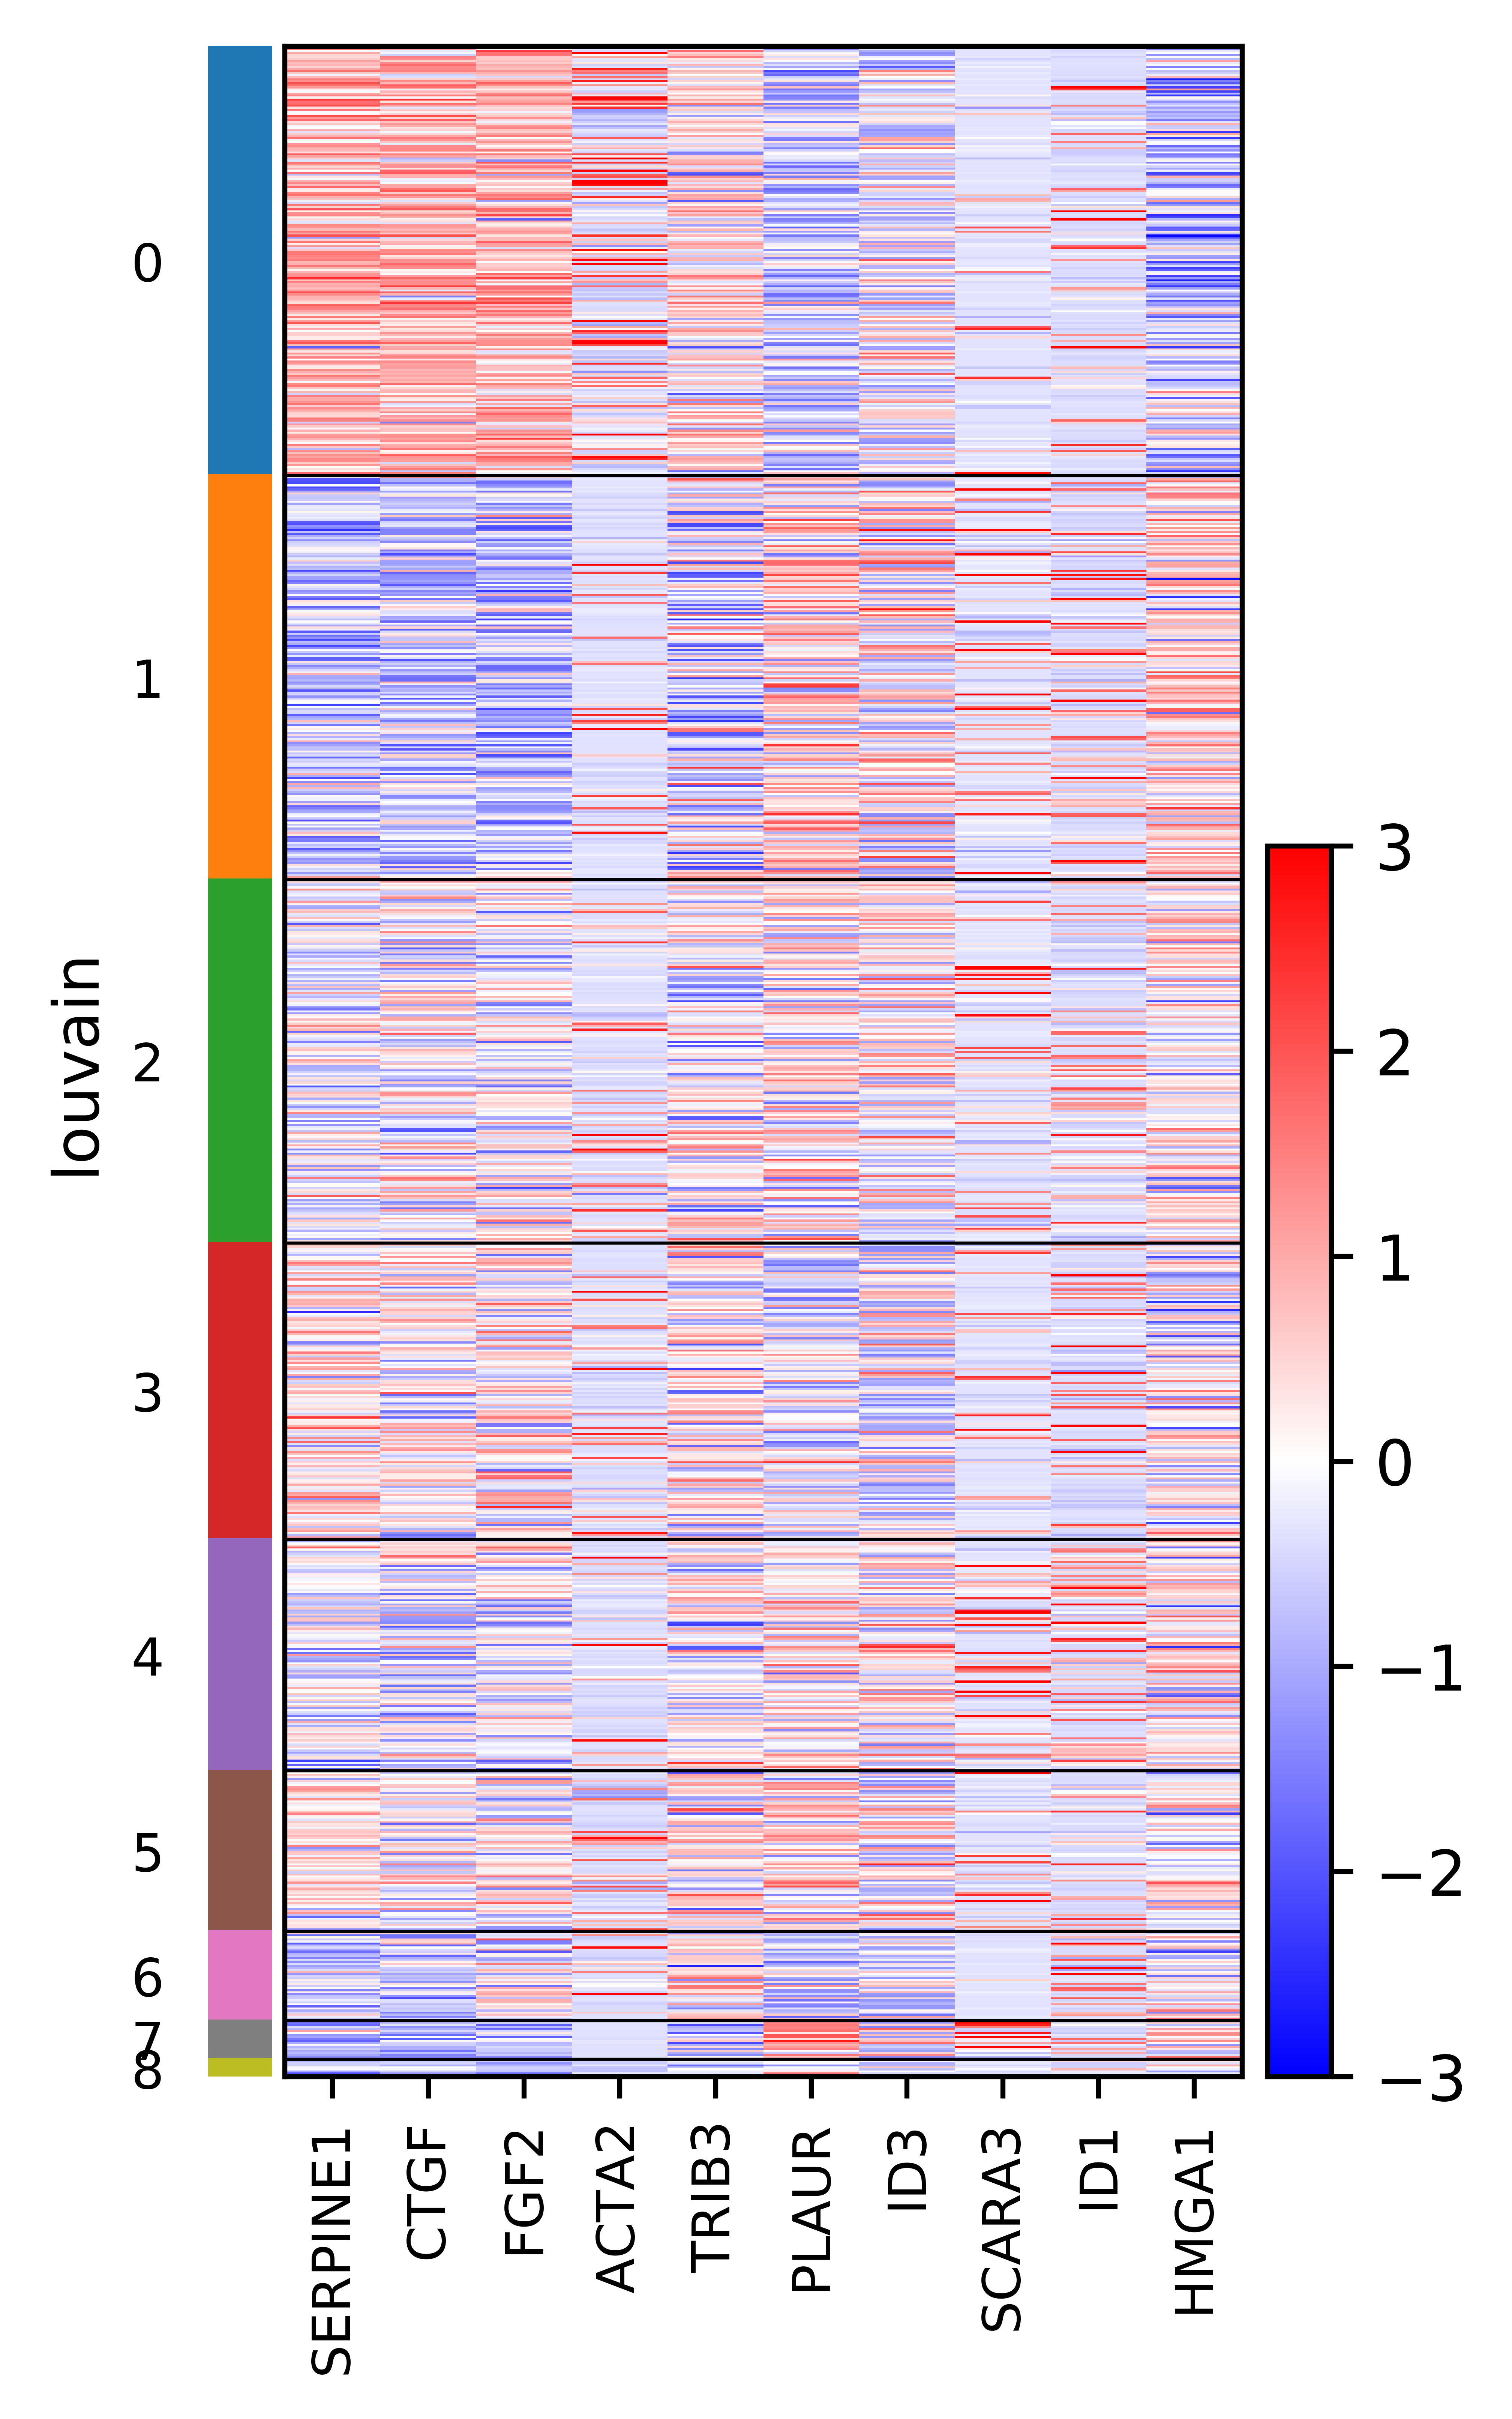

GridSpec(2, 4, height_ratios=[0, 6], width_ratios=[0.2, 3.0, 0, 0.2])

In [6]:
sc.pl.heatmap(df, ['SERPINE1', 'CTGF', 'FGF2', 'ACTA2', 'TRIB3', 'PLAUR', 'ID3', 'SCARA3', 'ID1','HMGA1'], groupby='louvain')

In [7]:
import collections

In [8]:
clusters = df.obs["louvain"].to_list()

In [32]:
genes = ['SERPINE1', 'CTGF', 'FGF2', 'ACTA2', 'TRIB3', 'PLAUR', 'ID3', 'SCARA3', 'ID1','HMGA1']

# TODO FIX WITH NEW GNE ONTOLOGY MOST HIGHLY EXPRESSED PER CLUSTER
genes += ["CTGF", "CADM1", "HNRNPH1", "CCDC80", "WWTR1", "ANXA2", "ARHGAP29", "S100A6", "RAET1G"]

    
louvain_counts = collections.Counter(df.obs["louvain"])
counts = df[:, genes].X
cumulative = np.zeros(shape=(len(louvain_counts), len(genes)))
for cluster, count in zip(df.obs["louvain"], counts):
    cumulative[int(cluster)] += count

for cluster, counts in louvain_counts.items():
    cumulative[int(cluster)] /= counts

[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8')]

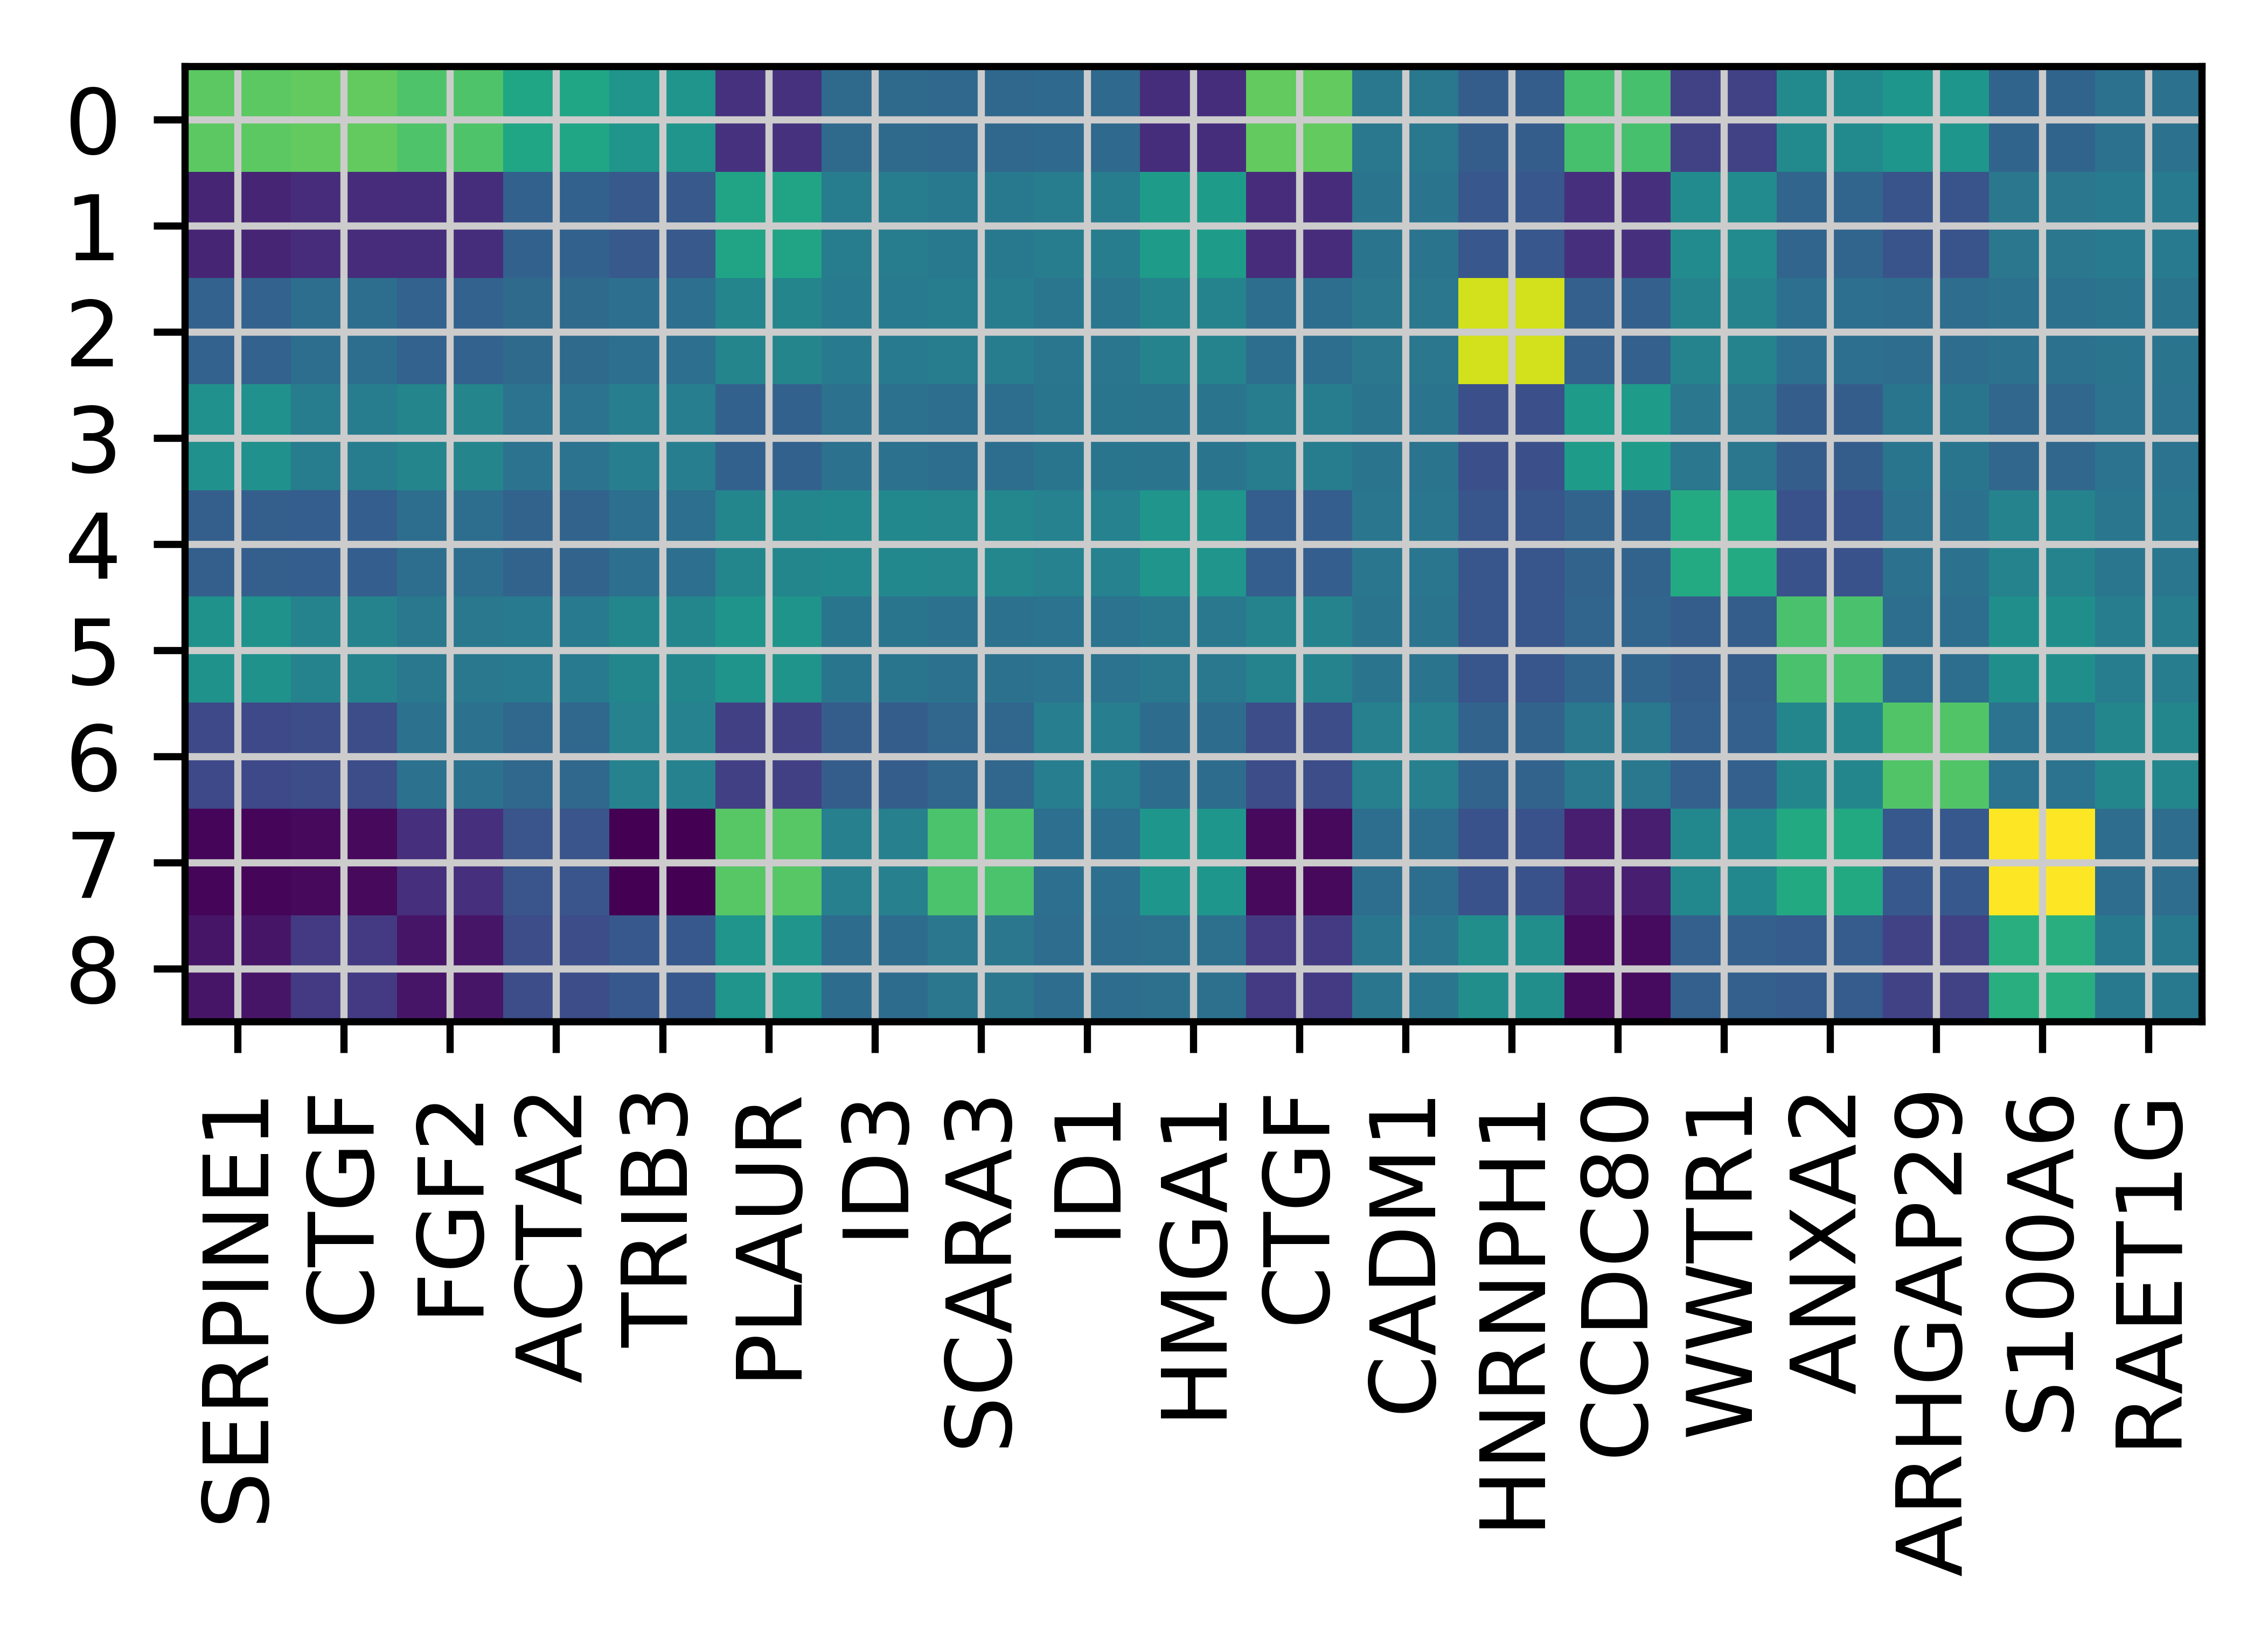

In [33]:
fig, ax = plt.subplots()
im = ax.imshow(cumulative)
louvain = range(len(louvain_counts))
# We want to show all ticks...
ax.set_xticks(np.arange(len(genes)))
plt.xticks(rotation="vertical")
ax.set_yticks(np.arange(len(louvain)))
# ... and label them with the respective list entries
ax.set_xticklabels(genes)
ax.set_yticklabels(louvain)